In [1]:
from sklearn.datasets import *
from pandas import *
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from tensorflow import *

In [2]:
d=read_csv('diabetes.csv')

In [3]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
d.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [6]:
from sklearn.preprocessing import StandardScaler,LabelEncoder

In [7]:
s=StandardScaler()

In [8]:
d['Glucose']=s.fit_transform(array(d['Glucose']).reshape(-1,1))

In [9]:
d['BloodPressure']=s.fit_transform(array(d['BloodPressure']).reshape(-1,1))
d['SkinThickness']=s.fit_transform(array(d['SkinThickness']).reshape(-1,1))
d['Insulin']=s.fit_transform(array(d['Insulin']).reshape(-1,1))
d['BMI']=s.fit_transform(array(d['BMI']).reshape(-1,1))
d['Age']=s.fit_transform(array(d['Age']).reshape(-1,1))

In [10]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,0.848324,0.149641,0.907270,-0.692891,0.204013,0.627,1.425995,1
1,1,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,0.351,-0.190672,0
2,8,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.672,-0.105584,1
3,1,-0.998208,-0.160546,0.154533,0.123302,-0.494043,0.167,-1.041549,0
4,0,0.504055,-1.504687,0.907270,0.765836,1.409746,2.288,-0.020496,1
...,...,...,...,...,...,...,...,...,...
763,10,-0.622642,0.356432,1.722735,0.870031,0.115169,0.171,2.532136,0
764,2,0.034598,0.046245,0.405445,-0.692891,0.610154,0.340,-0.531023,0
765,5,0.003301,0.149641,0.154533,0.279594,-0.735190,0.245,-0.275760,0
766,1,0.159787,-0.470732,-1.288212,-0.692891,-0.240205,0.349,1.170732,1


In [11]:
x=d.drop('Outcome',axis=1)
y=d['Outcome']

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y)

In [13]:
from keras.utils import *
from keras import *
from keras.layers import *

In [14]:
y_train=to_categorical(y_train)

In [15]:
model=Sequential([
    Dense(512,input_shape=(8,),activation='sigmoid'),
     Dense(2,activation='softmax')
])
model.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')

In [16]:
h=model.fit(x_train,y_train,epochs=50)

Epoch 1/50
20/20 [==============================] - 1s 4ms/step - loss: 0.6603 - accuracy: 0.6140
Epoch 2/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5924 - accuracy: 0.6726
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5608 - accuracy: 0.7231
Epoch 4/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5387 - accuracy: 0.7150
Epoch 5/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5153 - accuracy: 0.7362
Epoch 6/50
20/20 [==============================] - 0s 2ms/step - loss: 0.5120 - accuracy: 0.7215
Epoch 7/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4933 - accuracy: 0.7459
Epoch 8/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4885 - accuracy: 0.7524
Epoch 9/50
20/20 [==============================] - 0s 2ms/step - loss: 0.4802 - accuracy: 0.7671
Epoch 10/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4827 - accuracy: 0.7524
Epoch 11/50
20/20 [

In [17]:
model.evaluate(x_test,to_categorical(y_test))

5/5 [==============================] - 0s 3ms/step - loss: 0.5342 - accuracy: 0.7727


[0.5342070460319519, 0.7727272510528564]

In [18]:
pred=model.predict(x_test)
pred=argmax(pred,axis=1)

5/5 [==============================] - 0s 2ms/step


In [19]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       100
           1       0.69      0.63      0.66        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



In [20]:
from matplotlib.pyplot import *
from seaborn import *

<Axes: >

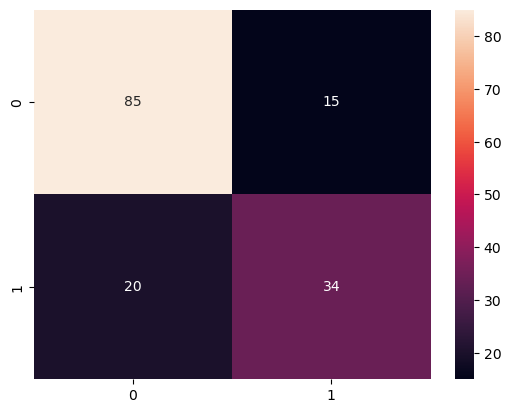

In [21]:
heatmap(confusion_matrix(y_test,pred),annot=True)

In [22]:
v=[i for i in range(1,51)]

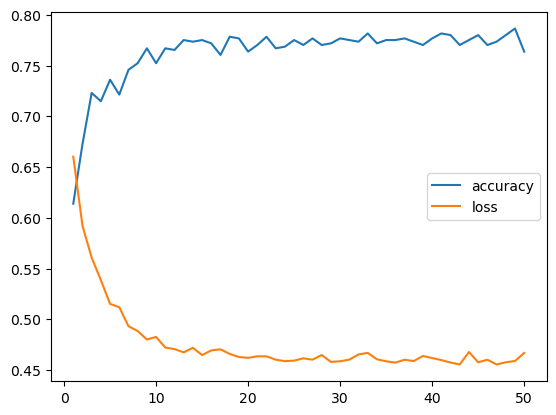

In [23]:
plot(v,h.history['accuracy'])
plot(v,h.history['loss'])
legend(['accuracy','loss'])

In [24]:
he=read_csv("Heart_Disease_Prediction.csv")

In [25]:
he

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,Absence
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,Absence
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,Absence
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,Absence


In [26]:
he.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [27]:
he.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
Sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
Chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
BP,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
Cholesterol,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
FBS over 120,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
EKG results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
Max HR,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
Exercise angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
ST depression,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [28]:
he['BP']=s.fit_transform(array(he['BP']).reshape(-1,1))
he['Cholesterol']=s.fit_transform(array(he['Cholesterol']).reshape(-1,1))
he['Max HR']=s.fit_transform(array(he['Max HR']).reshape(-1,1))
he['Age']=s.fit_transform(array(he['Age']).reshape(-1,1))

In [29]:
he

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,2.4,2,3,3,Presence
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,1.6,2,0,7,Absence
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,0.3,1,0,7,Presence
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,0.2,2,1,7,Absence
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,0.2,1,1,3,Absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3,2.280369,-0.981951,1,0,0.532904,0,0.5,1,0,7,Absence
266,-1.147506,1,2,-0.636310,0.258589,0,0,1.008625,0,0.0,1,0,7,Absence
267,0.172309,0,2,0.485490,0.859476,0,2,0.143677,0,1.3,2,0,3,Absence
268,0.282294,1,4,0.485490,-1.117635,0,0,-0.072560,0,0.4,2,0,6,Absence


In [30]:
l=LabelEncoder()

In [31]:
he['Heart Disease']=l.fit_transform(array(he['Heart Disease']).reshape(-1,1))

C:\Users\manju\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
he

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,1.712094,1,4,-0.075410,1.402212,0,2,-1.759208,0,2.4,2,3,3,1
1,1.382140,0,3,-0.916759,6.093004,0,2,0.446409,0,1.6,2,0,7,0
2,0.282294,1,2,-0.411950,0.219823,0,0,-0.375291,0,0.3,1,0,7,1
3,1.052186,1,4,-0.187590,0.258589,0,0,-1.932198,1,0.2,2,1,7,0
4,2.152032,0,2,-0.636310,0.374890,0,2,-1.240239,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,-0.267629,1,3,2.280369,-0.981951,1,0,0.532904,0,0.5,1,0,7,0
266,-1.147506,1,2,-0.636310,0.258589,0,0,1.008625,0,0.0,1,0,7,0
267,0.172309,0,2,0.485490,0.859476,0,2,0.143677,0,1.3,2,0,3,0
268,0.282294,1,4,0.485490,-1.117635,0,0,-0.072560,0,0.4,2,0,6,0


In [33]:
x1=he.drop('Heart Disease',axis=1)
y1=he['Heart Disease']
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=0.2,stratify=y1)

In [34]:
y_train1=to_categorical(y_train1)

In [35]:
model1=Sequential([
    Dense(512,input_shape=(13,),activation='sigmoid'),
     Dense(2,activation='softmax')
])
model1.compile(metrics=['accuracy'],loss='binary_crossentropy',optimizer='adam')

In [36]:
h1=model1.fit(x_train1,y_train1,epochs=50)

Epoch 1/50
7/7 [==============================] - 1s 2ms/step - loss: 0.7088 - accuracy: 0.6019
Epoch 2/50
7/7 [==============================] - 0s 4ms/step - loss: 0.6430 - accuracy: 0.7454
Epoch 3/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.8009
Epoch 4/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5609 - accuracy: 0.7917
Epoch 5/50
7/7 [==============================] - 0s 3ms/step - loss: 0.5303 - accuracy: 0.8287
Epoch 6/50
7/7 [==============================] - 0s 4ms/step - loss: 0.5060 - accuracy: 0.8241
Epoch 7/50
7/7 [==============================] - 0s 4ms/step - loss: 0.4843 - accuracy: 0.8241
Epoch 8/50
7/7 [==============================] - 0s 2ms/step - loss: 0.4621 - accuracy: 0.8287
Epoch 9/50
7/7 [==============================] - 0s 3ms/step - loss: 0.4499 - accuracy: 0.8472
Epoch 10/50
7/7 [==============================] - 0s 5ms/step - loss: 0.4339 - accuracy: 0.8380
Epoch 11/50
7/7 [======================

In [37]:
model1.evaluate(x_test1,to_categorical(y_test1))

2/2 [==============================] - 0s 6ms/step - loss: 0.4951 - accuracy: 0.8148


[0.49507981538772583, 0.8148148059844971]

In [38]:
pred1=model1.predict(x_test1)
pred1=argmax(pred1,axis=1)

2/2 [==============================] - 0s 3ms/step


In [39]:
print(classification_report(y_test1,pred1))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        30
           1       0.85      0.71      0.77        24

    accuracy                           0.81        54
   macro avg       0.82      0.80      0.81        54
weighted avg       0.82      0.81      0.81        54



<Axes: >

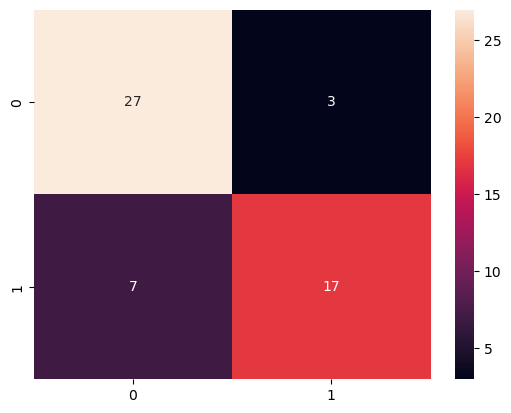

In [40]:
heatmap(confusion_matrix(y_test1,pred1),annot=True)

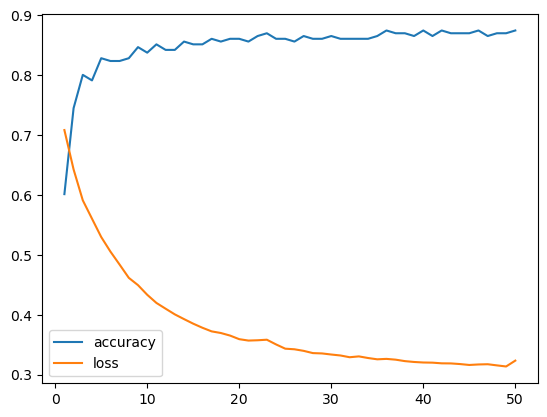

In [41]:
plot(v,h1.history['accuracy'])
plot(v,h1.history['loss'])
legend(['accuracy','loss'])

In [42]:
model.save('dia')

INFO:tensorflow:Assets written to: dia\assets


INFO:tensorflow:Assets written to: dia\assets


In [43]:
model1.save('heart')

INFO:tensorflow:Assets written to: heart\assets


INFO:tensorflow:Assets written to: heart\assets
